[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/MSML_602/blob/main/image_classification_DL.ipynb)

# <h1> <b> <center> Image Classification Using Feed Forwared Neural Networks / Convolution Neural Networks / Vision Transformers </center> </b> </h1>


Collaborators:
- Sarvesh Khetan
- Siri Reddy
- Umesh Adari

# <h1> <b> <center> Introduction </center> </b> </h1>

In the ever changing world of online shopping, product categorization accuracy is becoming more and more crucial. Customers will be more satisfied and have greater conversion rates if they can quickly search for and locate the products they want thanks to an automatic tagging system that works well. But one of the biggest problems in creating such systems is the noisy data present, where objects maybe incorrectly identified for a number of reasons, including mislabeling or unclear labeling made during data collection.

Hence our aim is to build such a model which is robust to noisy data. Researcher have found multiple ways to do so . We want to see how these models perform on this type of dataset.

Answering these questions are important becuase
-
- It will help to further research





# <h1> <b> <center> Installing Relevant Libraries </center> </b> </h1>

In [ ]:
!pip install "cleanvision[huggingface]"
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beh

# <h1> <b> <center> Relevant Imports </center> </b> </h1>

In [ ]:
# Import PyTorch
import torch
from torch import nn

# import pandas as pd
import os
import pandas as pd
import numpy as np
from datasets import load_dataset, concatenate_datasets
from cleanvision import Imagelab
from PIL import Image
import requests
import cv2
import imagehash

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, TensorDataset

# Import matplotlib for visualization
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


# <h1> <b> <center> Data curation </center> </b> </h1>

Earlier we planned to use [Clothing1M dataset](https://paperswithcode.com/dataset/clothing1m) but the authors of this paper have not reverted back with the dataset drive link and hence we pivoted to using the fashionMNIST dataset. Here are some key things to know about [fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) :

- It consists of 70,000 grayscale images of fashion products from 10 categories15.

- The dataset is split into 60,000 training images and 10,000 test images13.

- Each image is 28x28 pixels in size13.

- The images are in grayscale, with pixel values ranging from 0 to 2553.

- There are 10 classes of fashion items, including T-shirts, trousers, dresses, and more46.

- It was created by Zalando Research as a more challenging alternative to the original MNIST dataset15.

- The dataset is commonly used for benchmarking machine learning algorithms, particularly in image classification tasks13.

- Fashion MNIST shares the same image size, data format, and structure of training and testing splits with the original MNIST dataset15.

- It is freely available and widely included in standard machine learning libraries14.

- The dataset has been used by various institutions, including Google, University of Cambridge, IBM Research, and others1.

- As of 2020, the top algorithm achieved 96.91% accuracy on this dataset1.

- The dataset is often used for training and evaluating deep learning models such as Convolutional Neural Networks (CNNs) and Support Vector Machines (SVMs)

### Downloading Dataset

In [ ]:
dataset_dict = load_dataset("zalando-datasets/fashion_mnist")

# train dataset
train_data = dataset_dict['train']
train_images = np.array(train_data['image'])
train_labels = np.array(train_data['label'])

# test dataset
test_data = dataset_dict['test']
test_images = np.array(test_data['image'])
test_labels = np.array(test_data['label'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/30.9M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/5.18M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

### Visualizing Dataset

In [ ]:
label_dic = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

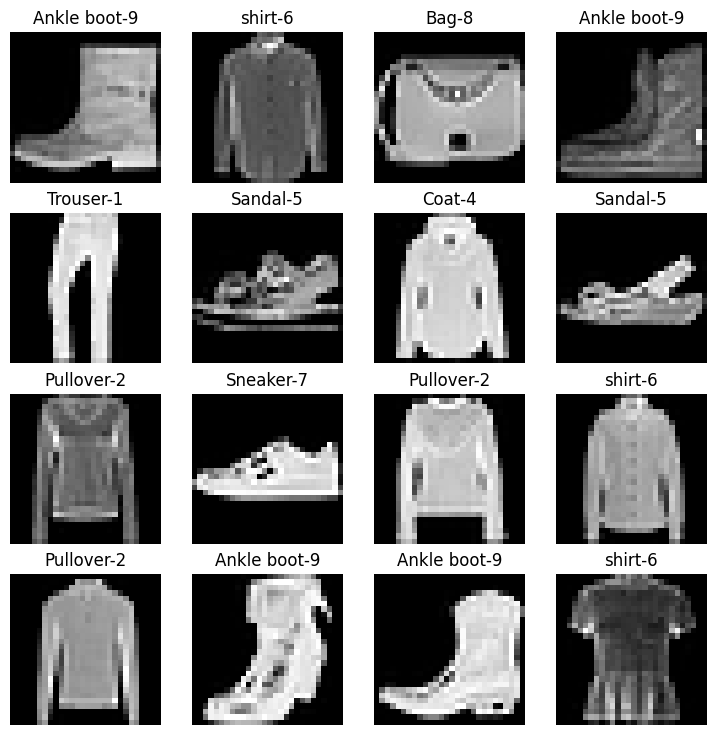

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))

for i in range(1, 4 * 4 + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img = train_images[random_idx]
    label = train_labels[random_idx]
    fig.add_subplot(4, 4, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f'{label_dic[label]}-{label}')
    plt.axis(False);

# <h1> <b> <center> Exploratory Data Analysis </center> </b> </h1>

In [ ]:
def data_cleaner(ims):

    imagelab = Imagelab(hf_dataset=ims, image_key="image")
    imagelab.find_issues()
    issue_df = imagelab.issues
    print(issue_df.columns)

    # handling images with low information
    images_with_low_information = issue_df[issue_df['is_low_information_issue'] == True].reset_index()[['index','low_information_score']]
    img_index_with_low_information = images_with_low_information['index']


    # handling dark images
    dark_images = issue_df[issue_df['is_dark_issue'] == True].reset_index()[['index','dark_score']]
    dark_img_index = dark_images['index']


    # handling duplicate images
    duplicate_images = issue_df[issue_df['is_near_duplicates_issue'] == True].reset_index()[['index','near_duplicates_score']]
    duplicate_images_index = []
    for i in imagelab.info["near_duplicates"]["sets"]:
      for j,counter in zip(i,range(0,len(i))):

          if counter == 0:
            continue

          else:
            duplicate_images_index.append(j)

    # appending all the images to be removed from dataset
    img_index_to_remove = list(set(list(img_index_with_low_information) + list(dark_img_index) + list(duplicate_images_index)))

    return img_index_to_remove

In [ ]:
to_remove = data_cleaner(train_data)

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

Issue checks completed. 70003 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Index(['odd_size_score', 'is_odd_size_issue', 'odd_aspect_ratio_score',
       'is_odd_aspect_ratio_issue', 'low_information_score',
       'is_low_information_issue', 'light_score', 'is_light_issue',
       'grayscale_score', 'is_grayscale_issue', 'dark_score', 'is_dark_issue',
       'blurry_score', 'is_blurry_issue', 'exact_duplicates_score',
       'is_exact_duplicates_issue', 'near_duplicates_score',
       'is_near_duplicates_issue'],
      dtype='object')


In [ ]:
print(f'Number of bad images found : {len(to_remove)}')

Number of bad images found : 9497


In [ ]:
# new image list
reduced_train_images = []
reduced_train_labels = []

for counter, im, label in zip(range(len(train_images)), train_images, train_labels):

    if counter in to_remove:
        continue

    else:
        reduced_train_images.append(im)
        reduced_train_labels.append(label)

# <h1> <b> <center> Modelling and Training using Feed Forward Neural Networks </center> </b> </h1>

- Explain what you are trying to do
- Include an image of the model that you are trying to build
- Add link to the medium article

## Creating Dataloaders

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalize for grayscale images
])

In [ ]:
reduced_train_images_tensor = torch.stack([transform(Image.fromarray(img)) for img in reduced_train_images])
reduced_train_labels_tensor = torch.tensor(np.array(reduced_train_labels), dtype=torch.long)
train_dataset = TensorDataset(reduced_train_images_tensor, reduced_train_labels_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
train_features_batch, train_labels_batch = next(iter(train_dataloader))

print(f"Features Batch Size {train_features_batch.shape}")
print(f"Labels Batch Size {train_labels_batch.shape}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of 32")

Features Batch Size torch.Size([32, 1, 28, 28])
Labels Batch Size torch.Size([32])
Length of train dataloader: 1579 batches of 32


In [ ]:
reduced_test_images_tensor = torch.stack([transform(Image.fromarray(img)) for img in test_images])
reduced_test_labels_tensor = torch.tensor(np.array(test_labels), dtype=torch.long)
test_dataset = TensorDataset(reduced_test_images_tensor, reduced_test_labels_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_features_batch, test_labels_batch = next(iter(test_dataloader))

print(f"Features Batch Size {test_features_batch.shape}")
print(f"Labels Batch Size {test_labels_batch.shape}")
print(f"Length of train dataloader: {len(test_dataloader)} batches of 32")

Features Batch Size torch.Size([32, 1, 28, 28])
Labels Batch Size torch.Size([32])
Length of train dataloader: 313 batches of 32


## Model Architecture

In [ ]:
# defining model architecture
class FFNN_Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=784, out_features=392),nn.ReLU(),
            nn.Linear(in_features=392, out_features=196),nn.ReLU(),
            nn.Linear(in_features=196, out_features=98),nn.ReLU(),
            nn.Linear(in_features=98, out_features=49),nn.ReLU(),
            nn.Linear(in_features=49, out_features=20),nn.ReLU(),
            nn.Linear(in_features=20, out_features=10),nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

# instantiating the model
ffnn_model = FFNN_Model().to(device)

## Training

In [ ]:
# defining evaluation metric for model => since we have a balanced dataset we will be using accuracy for our model
def accuracy_fn(y_true, y_pred):
    return (torch.eq(y_true, y_pred).sum().item() / len(y_pred)) * 100

In [ ]:
def train_step(model, train_dataloader, optimizer):

    # defining optimizer for the model
    if optimizer == 'SGD':
        optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

    # defining loss function for model
    loss_fn = nn.CrossEntropyLoss()

    # housekeeping stuff
    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []

    for epoch in tqdm(range(50)):

        print(f"Epoch: {epoch}\n-------")



        '''
        TRAINING
        '''
        train_loss, train_acc = 0, 0
        model.train()
        for batch, (X, y) in enumerate(train_dataloader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X) #Forward pass

            loss = loss_fn(y_pred, y) # Calculate loss (per batch)
            acc = accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

            train_loss += loss # accumulatively add up the loss per epoch
            train_acc += acc # Go from logits -> pred labels

            optimizer.zero_grad() # Optimizer zero grad
            loss.backward() # Loss backward
            optimizer.step() # Optimizer step

            # Print out how many samples have been seen
            if batch % 400 == 0:
                print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

        # Divide total train loss by length of train dataloader (average loss per batch per epoch)
        train_loss /= len(train_dataloader)
        train_acc /= len(train_dataloader)
        print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

        # housekeeping stuff
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)






        '''
        TESTING
        '''
        test_loss, test_acc = 0, 0
        model.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                X, y = X.to(device), y.to(device)
                test_pred = model(X) # Forward pass

                loss = loss_fn(test_pred, y)
                acc = accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

                test_loss += loss
                test_acc += acc

            # Calculations on test metrics need to happen inside torch.inference_mode()
            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)

        print(f"Test loss: {test_loss:.5f}  | Test acc: {test_acc:.2f}%\n")

        # housekeeping stuff
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)




    return train_loss_list, train_acc_list, test_loss_list, test_acc_list

In [ ]:
train_loss_ffnn, train_acc_ffnn, test_loss_ffnn, test_acc_ffnn = train_step(ffnn_model, train_dataloader, 'SGD')

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 samples
Train loss: 0.43478 | Train accuracy: 84.11%
Test loss: 0.77687  | Test acc: 75.65%

Epoch: 1
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 samples
Train loss: 0.39501 | Train accuracy: 85.50%
Test loss: 0.46961  | Test acc: 83.44%

Epoch: 2
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 samples
Train loss: 0.36878 | Train accuracy: 86.39%
Test loss: 0.40515  | Test acc: 85.05%

Epoch: 3
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 samples
Train loss: 0.34884 | Train accuracy: 87.07%
Test loss: 0.57836  | Test acc: 79.27%

Epoch: 4
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 sam

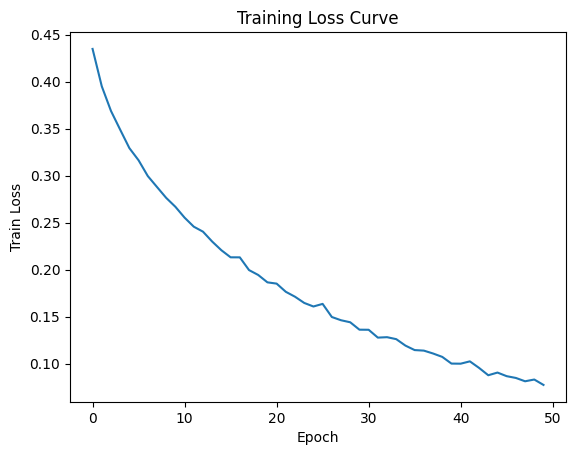

In [ ]:
plt.plot([loss.item() for loss in train_loss_ffnn])
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curve")
plt.show()

#  Make sure that every element of the plots are labeled and explained (don’t forget to include a legend!).


## Model Saving

In [ ]:
# saving the model
torch.save(ffnn_model.state_dict(), 'ffnn_model.pth')

# <h1> <b> <center> Modelling and Training using Convolution Neural Networks (Resnet) </center> </b> </h1>

In [ ]:
class ResidualBlock2(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels

        self.block = nn.Sequential(
                                      nn.Conv2d( in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False), nn.BatchNorm2d(out_channels), nn.ReLU(),
                                      nn.Conv2d( out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False), nn.BatchNorm2d(out_channels), nn.ReLU(),
                                      nn.Conv2d( out_channels, out_channels * 4, kernel_size=1, stride=1, padding=0, bias=False), nn.BatchNorm2d(out_channels * 4)
                                  )

        self.dim_matching_layer = nn.Sequential(
                            nn.Conv2d(in_channels, out_channels*4, kernel_size = 1, stride = stride, bias = False),
                            nn.BatchNorm2d(out_channels*4)
                            )

    def forward(self, x):

        if self.in_channels != 4 * self.out_channels:
            return self.block(x) + self.dim_matching_layer(x)

        return self.block(x) + x

In [ ]:
class ResNet(nn.Module):

    def __init__(self):
        super(ResNet, self).__init__()

        self.conv1 = nn.Sequential( nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False), nn.BatchNorm2d(64), nn.ReLU() )
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = nn.Sequential(
                                        ResidualBlock2(64, 64, 1),
                                        ResidualBlock2(256, 64),
                                        # ResidualBlock2(256, 64)
                                    )

        self.layer2 = nn.Sequential(
                                        ResidualBlock2(256, 128, 2),
                                        ResidualBlock2(512, 128),
                                        # ResidualBlock2(512, 128), #1
                                        # ResidualBlock2(512, 128), #2
                                        # ResidualBlock2(512, 128), #3
                                        # ResidualBlock2(512, 128), #4
                                        # ResidualBlock2(512, 128), #5
                                        ResidualBlock2(512, 128)  #6
                                    )

        self.layer3 = nn.Sequential(
                                        ResidualBlock2(512, 256, 2),
                                        ResidualBlock2(1024, 256),

                                        ResidualBlock2(1024, 256), #1
                                        # ResidualBlock2(1024, 256), #2
                                        # ResidualBlock2(1024, 256), #3
                                        # ResidualBlock2(1024, 256), #4
                                        # ResidualBlock2(1024, 256), #5
                                        # ResidualBlock2(1024, 256), #6

                                        ResidualBlock2(1024, 256), #7
                                        # ResidualBlock2(1024, 256), #8
                                        # ResidualBlock2(1024, 256), #9
                                        # ResidualBlock2(1024, 256), #10
                                        # ResidualBlock2(1024, 256), #11
                                        # ResidualBlock2(1024, 256), #12

                                        ResidualBlock2(1024, 256), #13
                                        # ResidualBlock2(1024, 256), #14
                                        # ResidualBlock2(1024, 256), #15
                                        # ResidualBlock2(1024, 256), #16
                                        # ResidualBlock2(1024, 256), #17
                                        # ResidualBlock2(1024, 256), #18

                                        ResidualBlock2(1024, 256), #19
                                        # ResidualBlock2(1024, 256), #20
                                        # ResidualBlock2(1024, 256), #21
                                        # ResidualBlock2(1024, 256), #22
                                        # ResidualBlock2(1024, 256), #23
                                        # ResidualBlock2(1024, 256), #24

                                        ResidualBlock2(1024, 256), #25
                                        # ResidualBlock2(1024, 256), #26
                                        # ResidualBlock2(1024, 256), #27
                                        # ResidualBlock2(1024, 256), #28
                                        # ResidualBlock2(1024, 256), #29
                                        # ResidualBlock2(1024, 256), #30

                                        # ResidualBlock2(1024, 256), #31
                                        # ResidualBlock2(1024, 256), #32
                                        # ResidualBlock2(1024, 256), #33
                                        ResidualBlock2(1024, 256), #34
                                    )

        self.layer4 = nn.Sequential(
                                        ResidualBlock2(1024, 512, 2),
                                        ResidualBlock2(2048, 512),
                                        ResidualBlock2(2048, 512),
                                    )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(2048, 10)

    def forward(self, x):

        # feature extraction
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)

        # image flattening
        x = x.reshape(x.shape[0], -1)

        # classification
        x = self.fc(x)

        return x

In [ ]:
# instantiating the model
resnet_model = ResNet().to(device)

In [ ]:
train_loss_res, train_acc_res, test_loss_ffnn, test_acc_res = train_step(resnet_model, train_dataloader, 'SGD')

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 samples
Train loss: 1.60686 | Train accuracy: 67.70%
Test loss: 4.16107  | Test acc: 71.76%

Epoch: 1
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 samples
Train loss: 0.58043 | Train accuracy: 79.54%
Test loss: 0.51627  | Test acc: 80.64%

Epoch: 2
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 samples
Train loss: 0.43881 | Train accuracy: 83.96%
Test loss: 0.41057  | Test acc: 84.98%

Epoch: 3
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 samples
Train loss: 0.38454 | Train accuracy: 85.72%
Test loss: 0.64745  | Test acc: 81.42%

Epoch: 4
-------
Looked at 0/50503 samples
Looked at 12800/50503 samples
Looked at 25600/50503 samples
Looked at 38400/50503 sam

In [ ]:
plt.plot([loss.item() for loss in train_loss_res])
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curve")
plt.show()

In [ ]:
# saving the model
torch.save(resnet_model.state_dict(), 'resnet_model.pth')

# <h1> <b> <center> Modelling and Training using Vision Transformers </center> </b> </h1>

In [ ]:
class ViT(nn.Module):

    def __init__(self, img_size:int=28, in_channels:int=1, patch_size:int=4, embedding_dim:int=768, mlp_size:int=3072, num_classes:int=1000):
        super().__init__()

        self.patch_embedding = nn.Sequential(nn.LayerNorm(1*4*4), nn.Linear(1*4*4, 768), nn.LayerNorm(768))

        self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim), requires_grad=True)

        num_patches = (img_size // patch_size) * (img_size // patch_size)
        # num_patches = (img_size * img_size) // patch_size**2
        self.position_embedding = nn.Parameter(data=torch.randn(1, num_patches+1, embedding_dim),requires_grad=True)
        self.embedding_dropout = nn.Dropout(p=0.1)

        self.transformer_encoder = nn.TransformerEncoder(encoder_layer=nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                                                                  nhead=2,
                                                                                                  dim_feedforward=mlp_size,
                                                                                                  activation="gelu",
                                                                                                  batch_first=True,
                                                                                                  norm_first=True), # Create a single Transformer Encoder Layer
                                                        num_layers=2) # Stack it N times
        self.classifier = nn.Sequential( nn.LayerNorm(normalized_shape=embedding_dim), nn.Linear(in_features=embedding_dim, out_features=num_classes))


    def forward(self, x):

        # 32, 1, 28, 28 -> 32, 1, 7*4, 7*4 -> 32, 1, 7, 7, 4, 4 -> 32, 7, 7, 4, 4, 1 -> 32, 7*7, 4*4*1 - > 32, num_patches, patch_dim
        x = rearrange(x, 'b c (nh ph) (nw pw) -> b (nh nw) (ph pw c)', ph=4, pw=4)

        # Create patch embedding for all images in the batch
        x = self.patch_embedding(x)

        # Create class embedding and expand it to match the batch size.
        class_token = self.class_embedding.expand(x.shape[0], -1, -1) # "-1" means to infer the dimension (try this line on its own)

        # Concat class embedding with the patch embedding
        x = torch.cat((class_token, x), dim=1)

        # 16. Add position embedding to patch embedding
        x = self.position_embedding + x

        # 17. Run embedding dropout
        x = self.embedding_dropout(x)

        # 18. Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
        x = self.transformer_encoder(x)

        # 19. Put 0 index logit through classifier (equation 4)
        x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

        return x

In [ ]:
model = ViT(num_classes=10).to(device)

# <h1> <b> <center>  Result Analysis and Conclusions  </center> </b> </h1>

- Show prediction and actual + show comparision between models
- performance on test data
- test data accuracy

In [ ]:
# To load the model later:
model = FFNN_Model() # Instantiate the model architecture
model.load_state_dict(torch.load('ffnn_model.pth'))
model.eval() # Set to evaluation mode